In [2]:
import control as ctl
import numpy as np

# Define the motor constants
K = 1.0   # Motor gain
T = 0.5   # Motor time constant

# Transfer function G(s) = K / (s(Ts + 1))
num = [K]
den = [T, 1]
g1  = ctl.TransferFunction([1],[0.0015,0.5])
g2  = ctl.TransferFunction([0.05],[0.00025,0.0001])

# motor_tf = ctl.TransferFunction(num, den)
motor_tf = ctl.series(g1,g2)

print("DC Motor Transfer Function G(s):")
print(motor_tf)


DC Motor Transfer Function G(s):
<TransferFunction>: sys[2]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


               0.05
----------------------------------
3.75e-07 s^2 + 0.0001252 s + 5e-05



In [15]:
# PID controller parameters
Kp = 0# Proportional gain
Ki = 10 # Integral gain
Kd = 10# Derivative gain

# PID transfer function C(s) = Kp + Ki/s + Kd*s
pid_tf = ctl.TransferFunction([Kd, Kp, Ki], [1, 0])

print("PID Controller Transfer Function C(s):")
print(pid_tf)

PID Controller Transfer Function C(s):
<TransferFunction>: sys[23]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


10 s^2 + 10
-----------
     s



In [16]:
# Open-loop transfer function L(s) = C(s) * G(s)
open_loop_tf = ctl.series(pid_tf, motor_tf)
Hs = ctl.TransferFunction([0.05],[1])
# Closed-loop transfer function H(s) = L(s) / (1 + L(s))
closed_loop_tf = ctl.feedback(open_loop_tf,Hs,sign=-1)

print("Closed-Loop Transfer Function H(s):")
print(closed_loop_tf)

Closed-Loop Transfer Function H(s):
<TransferFunction>: sys[26]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


               0.5 s^2 + 0.5
--------------------------------------------
3.75e-07 s^3 + 0.02513 s^2 + 5e-05 s + 0.025



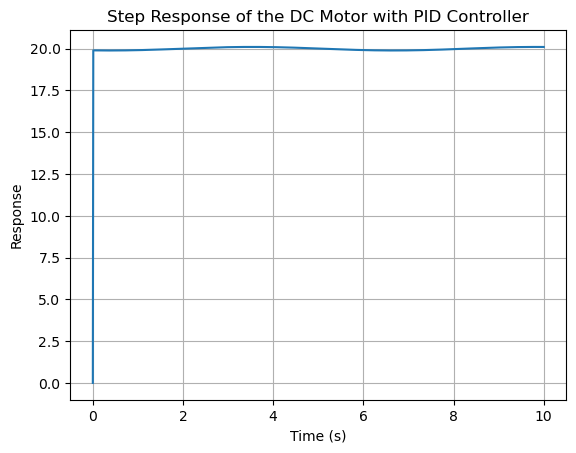

In [17]:
import matplotlib.pyplot as plt

# Time vector for simulation
time = np.linspace(0, 10, 1000)

# Step response
time, response = ctl.step_response(closed_loop_tf, time)

# Plot the step response
plt.figure()
plt.plot(time, response)
plt.title('Step Response of the DC Motor with PID Controller')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.grid(True)
plt.show()
